# Inital Data Cleaning 
### Purpose
This notebook provides the intial data cleaning and data exploration for the Christmas BirdCount Project. We also limit the scope to just cirlces in the USA.


### Author: 
Jeff Hale
### Date: 
2019-05-29
### Update Date: 
2020-06-17

### Inputs 
Raw Christmas Bird Count Data from Audubon Socity.
Example
cbc_effort_weather_1900-2018.txt - Tab seperated file of Christmas Bird Count events going back to 1900. Each row represents a single count in a given year. Data Dictonary can be found here: http://www.audubon.org/sites/default/files/documents/cbc_report_field_definitions_2013.pdf
Data is saved in this folder: 
https://drive.google.com/drive/folders/1Nlj9Nq-_dPFTDbrSDf94XMritWYG6E2I

### Output Files
1.0-rec-initial-data-cleaning.txt - Tab seperated file that has been clean adn the scope limited to cbc circles in the united states.   

File will be saved in the google drive folder:
https://drive.google.com/drive/folders/1Nlj9Nq-_dPFTDbrSDf94XMritWYG6E2I

## Steps or Proceedures in the notebook 
- Load data from the Audubon Socity 
- Drop the test sites
- Explore the Shpae and Contents of the Data
- Data Metric Conversions for temperture snow and wind
- Impossible value removal
- Remove Duplicates and Create a unnique identifyer
- Limit the Data to Use Circles in the USA 

## Where the Data will Be Saved 
All data for this project will be saved in Google Drive. To start experimenting with data, download the folder here and put it into your data folder.
https://drive.google.com/drive/folders/1Nlj9Nq-_dPFTDbrSDf94XMritWYG6E2I

The path should look like this: 
audubon-cbc/data/Cloud_Data/<DATA FILE>



### See data dictionary: 

http://www.audubon.org/sites/default/files/documents/cbc_report_field_definitions_2013.pdf

In [1]:
# Imports
import numpy as np
import pandas as pd
import plotly_express as px
import matplotlib.pyplot as plt
import seaborn as sns
import gcsfs

pd.set_option('display.max_columns', 500)

## Set Global Variables

In [2]:
# ALL File Paths should be declared at the TOP of the notebook
PATH_TO_RAW_CBC_DATA = "../data/Cloud_Data/cbc_effort_weather_1900-2018.txt"

In [3]:
raw_data = pd.read_csv(PATH_TO_RAW_CBC_DATA, encoding = "ISO-8859-1", sep="\t")

In [4]:
raw_data.head()

,circle_name,country_state,lat,lon,count_year,count_date,n_field_counters,n_feeder_counters,min_field_parties,max_field_parties,field_hours,feeder_hours,nocturnal_hours,field_distance,nocturnal_distance,distance_units,min_temp,max_temp,temp_unit,min_wind,max_wind,wind_unit,min_snow,max_snow,snow_unit,am_cloud,pm_cloud,am_rain,pm_rain,am_snow,pm_snow
0,Scotch Lake,CA-NB,45.950000,-66.983300,1901,12/25/00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Toronto,CA-ON,43.700000,-79.416700,1901,12/25/00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pacific Grove,US-CA,36.616700,-121.916700,1901,12/25/00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pueblo,US-CO,38.175251,-104.519575,1901,12/25/00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bristol,US-CT,41.671800,-72.949500,1901,12/25/00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
raw_data.tail()

,circle_name,country_state,lat,lon,count_year,count_date,n_field_counters,n_feeder_counters,min_field_parties,max_field_parties,field_hours,feeder_hours,nocturnal_hours,field_distance,nocturnal_distance,distance_units,min_temp,max_temp,temp_unit,min_wind,max_wind,wind_unit,min_snow,max_snow,snow_unit,am_cloud,pm_cloud,am_rain,pm_rain,am_snow,pm_snow
106924,Sundance,US-WY,44.208072,-104.227101,2018,12/30/17,4.0,12.0,3.0,3.0,21.95,5.0,NaN,233.7,NaN,Miles,5.0,25.0,2.0,10.0,20.0,1.0,1.0,4.0,2.0,6.0,6.0,3,3,3,3
106925,"Tortola, British V.I.",VG-,18.350191,-64.616712,2018,12/30/17,2.0,NaN,NaN,2.0,10.50,NaN,NaN,21.0,NaN,Miles,77.0,84.0,2.0,6.0,12.0,3.0,NaN,NaN,NaN,5.0,6.0,3,3,3,3
106926,"East End, St. Croix, USVI",VI-,17.757222,-64.560191,2018,12/17/17,17.0,NaN,NaN,7.0,40.60,NaN,NaN,237.0,NaN,Miles,78.0,85.0,2.0,0.0,28.0,1.0,NaN,NaN,NaN,6.0,2.0,3,1,"3,1",3
106927,"St. Croix, USVI",VI-,17.716794,-64.783308,2018,12/17/17,19.0,NaN,NaN,10.0,74.75,NaN,NaN,225.6,NaN,Miles,78.0,85.0,2.0,0.0,28.0,1.0,NaN,NaN,NaN,6.0,2.0,3,1,NaN,NaN
106928,"St. John, USVI",VI-,18.350191,-64.700021,2018,12/23/17,24.0,NaN,16.0,16.0,30.00,0.0,NaN,18.0,NaN,Miles,73.0,85.0,2.0,0.0,7.0,1.0,NaN,NaN,NaN,1.0,1.0,3,3,NaN,NaN


In [6]:
len(raw_data)

106929

## Drop the test sites

In [7]:
raw_data = raw_data.drop(raw_data[raw_data["circle_name"].str.contains("do not")].index)

## Explore the Shpae and Contents of the Data

In [8]:
raw_data.shape

(106925, 31)

In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106925 entries, 0 to 106928
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   circle_name         106925 non-null  object 
 1   country_state       106925 non-null  object 
 2   lat                 106925 non-null  float64
 3   lon                 106925 non-null  float64
 4   count_year          106925 non-null  int64  
 5   count_date          106925 non-null  object 
 6   n_field_counters    106707 non-null  float64
 7   n_feeder_counters   50575 non-null   float64
 8   min_field_parties   56210 non-null   float64
 9   max_field_parties   57093 non-null   float64
 10  field_hours         97024 non-null   float64
 11  feeder_hours        61910 non-null   float64
 12  nocturnal_hours     58526 non-null   float64
 13  field_distance      98802 non-null   float64
 14  nocturnal_distance  53193 non-null   float64
 15  distance_units      106597 non-nul

In [10]:
raw_data.describe(include = 'all')

,circle_name,country_state,lat,lon,count_year,count_date,n_field_counters,n_feeder_counters,min_field_parties,max_field_parties,field_hours,feeder_hours,nocturnal_hours,field_distance,nocturnal_distance,distance_units,min_temp,max_temp,temp_unit,min_wind,max_wind,wind_unit,min_snow,max_snow,snow_unit,am_cloud,pm_cloud,am_rain,pm_rain,am_snow,pm_snow
count,106925,106925,106925.000000,106925.000000,106925.000000,106925,106707.000000,50575.000000,56210.000000,57093.000000,97024.000000,61910.000000,58526.000000,98802.000000,53193.000000,106597,82436.000000,82420.000000,57026.000000,80027.000000,80109.000000,57026.000000,76936.000000,77165.000000,53379.000000,82396.000000,82268.000000,81682,81582,81484,81410
unique,4821,199,NaN,NaN,NaN,1573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,14,13,13
top,Springfield,US-CA,NaN,NaN,NaN,12/16/17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,3,3
freq,258,5869,NaN,NaN,NaN,669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43250,44083,44380,44891
mean,NaN,NaN,39.988133,-91.624462,1987.639149,NaN,20.836352,4.657242,8.273261,9.941009,61.543311,10.986204,2.811273,285.538319,15.829516,NaN,25.614842,39.807880,1.883474,4.383454,12.424563,1.180900,2.024964,4.493643,2.207160,2.978021,3.243084,NaN,NaN,NaN,NaN
std,NaN,NaN,7.594241,19.897468,24.865097,NaN,21.376734,15.635358,7.591907,9.100070,56.407573,39.120613,7.010222,275.976110,145.776465,NaN,90.381411,102.846389,0.320857,5.703883,10.146659,0.638249,5.576817,11.105600,0.609436,2.016466,2.136045,NaN,NaN,NaN,NaN
min,NaN,NaN,-77.461409,-177.380631,1901.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,-56.000000,0.000000,0.000000,0.000000,NaN,-340.000000,-200.000000,1.000000,-16.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,36.500018,-102.483303,1975.000000,NaN,8.000000,0.000000,4.000000,5.000000,27.300000,0.000000,0.000000,136.000000,0.000000,NaN,15.000000,28.000000,2.000000,0.000000,5.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,40.816675,-88.024596,1993.000000,NaN,15.000000,1.000000,6.000000,8.000000,48.000000,3.000000,1.000000,256.000000,3.000000,NaN,27.000000,39.000000,2.000000,3.000000,10.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,44.076819,-78.550000,2007.000000,NaN,27.000000,5.000000,10.000000,12.000000,78.000000,10.000000,4.000000,392.725000,20.000000,NaN,36.000000,52.000000,2.000000,6.000000,15.000000,1.000000,2.000000,5.000000,2.000000,5.000000,6.000000,NaN,NaN,NaN,NaN


In [11]:
raw_data.isnull().sum()

circle_name               0
country_state             0
lat                       0
lon                       0
count_year                0
count_date                0
n_field_counters        218
n_feeder_counters     56350
min_field_parties     50715
max_field_parties     49832
field_hours            9901
feeder_hours          45015
nocturnal_hours       48399
field_distance         8123
nocturnal_distance    53732
distance_units          328
min_temp              24489
max_temp              24505
temp_unit             49899
min_wind              26898
max_wind              26816
wind_unit             49899
min_snow              29989
max_snow              29760
snow_unit             53546
am_cloud              24529
pm_cloud              24657
am_rain               25243
pm_rain               25343
am_snow               25441
pm_snow               25515
dtype: int64

In [12]:
#What percentage are null
pd.DataFrame((raw_data.isnull().sum())/len(raw_data) * 100).sort_values(by = 0, ascending = False)

,0
n_feeder_counters,52.700491
nocturnal_distance,50.252046
snow_unit,50.078092
min_field_parties,47.430442
wind_unit,46.667290
temp_unit,46.667290
max_field_parties,46.604629
nocturnal_hours,45.264438
feeder_hours,42.099603
min_snow,28.046762


In [13]:
#What types are the different variables
raw_data.dtypes.sort_values()

count_year              int64
nocturnal_hours       float64
max_snow              float64
min_snow              float64
wind_unit             float64
max_wind              float64
min_wind              float64
temp_unit             float64
max_temp              float64
min_temp              float64
pm_cloud              float64
nocturnal_distance    float64
field_distance        float64
am_cloud              float64
feeder_hours          float64
field_hours           float64
max_field_parties     float64
min_field_parties     float64
n_feeder_counters     float64
n_field_counters      float64
lon                   float64
lat                   float64
snow_unit             float64
am_rain                object
pm_rain                object
circle_name            object
distance_units         object
count_date             object
country_state          object
am_snow                object
pm_snow                object
dtype: object

__N Field Counters__

In [14]:
raw_data['n_field_counters'].describe()

count    106707.000000
mean         20.836352
std          21.376734
min           0.000000
25%           8.000000
50%          15.000000
75%          27.000000
max         501.000000
Name: n_field_counters, dtype: float64

In [15]:
(raw_data['n_field_counters'].isnull().sum()) / len(raw_data) * 100

0.2038812251578209

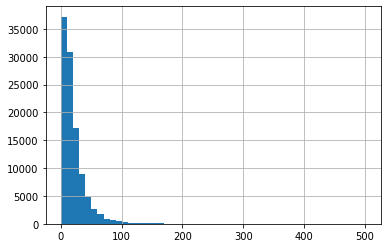

In [16]:
raw_data['n_field_counters'].hist(bins = 50);

In [17]:
raw_data.loc[raw_data['n_field_counters'] < 100].shape[0] / len(raw_data)

0.9857096095393968

__Count Year__

In [18]:
raw_data['count_year'].describe()

count    106925.000000
mean       1987.639149
std          24.865097
min        1901.000000
25%        1975.000000
50%        1993.000000
75%        2007.000000
max        2018.000000
Name: count_year, dtype: float64

In [19]:
(raw_data['count_year'].isnull().sum())/len(raw_data) * 100

0.0

In [20]:
raw_data.min()

circle_name           (Horton) Four Rivers
country_state                          AQ-
lat                               -77.4614
lon                               -177.381
count_year                            1901
count_date                          1/1/00
n_field_counters                         0
n_feeder_counters                        0
min_field_parties                        0
max_field_parties                        0
field_hours                              0
feeder_hours                           -56
nocturnal_hours                          0
field_distance                           0
nocturnal_distance                       0
min_temp                              -340
max_temp                              -200
temp_unit                                1
min_wind                               -16
max_wind                                 0
wind_unit                                0
min_snow                                 0
max_snow                                 0
snow_unit  

In [21]:
raw_data.max()

circle_name           Îles-de-la-Madeleine
country_state                        us-wi
lat                                74.7167
lon                                179.285
count_year                            2018
count_date                         3/16/04
n_field_counters                       501
n_feeder_counters                      968
min_field_parties                      150
max_field_parties                      322
field_hours                           4407
feeder_hours                          6105
nocturnal_hours                       1105
field_distance                       61087
nocturnal_distance                   33080
min_temp                             24996
max_temp                             28909
temp_unit                                2
min_wind                                99
max_wind                               500
wind_unit                                3
min_snow                               600
max_snow                               900
snow_unit  

## Make a new dataframe named df that we will add columns to.

In [22]:
df = raw_data

## Data Metric Conversions
Will make two columns.

One for metric (SI) and one for imperial.

## Create columsn for imperial and metric.
key = distance_units

miles = 1
inches = 2
kilometers = 3
centimeters = 4

In [23]:
distance_cols = ['field_distance', 'nocturnal_distance']

In [24]:
df.distance_units.value_counts()

Miles         99863
Kilometers     6734
Name: distance_units, dtype: int64

In [25]:
df['field_distance_imperial'] = np.where(df['distance_units']=='Miles', df['field_distance'], (df['field_distance'] * .6214))
df['field_distance_metric'] = np.where(df['distance_units']=='Kilometers', df['field_distance'], (df['field_distance'] / .6214))
df['nocturnal_distance_imperial'] = np.where(df['distance_units']=='Miles', df['nocturnal_distance'], (df['nocturnal_distance'] * .6214))
df['nocturnal_distance_metric'] = np.where(df['distance_units']=='Kilometers', df['nocturnal_distance'], (df['nocturnal_distance'] / .6214))

In [26]:
df.head()

,circle_name,country_state,lat,lon,count_year,count_date,n_field_counters,n_feeder_counters,min_field_parties,max_field_parties,field_hours,feeder_hours,nocturnal_hours,field_distance,nocturnal_distance,distance_units,min_temp,max_temp,temp_unit,min_wind,max_wind,wind_unit,min_snow,max_snow,snow_unit,am_cloud,pm_cloud,am_rain,pm_rain,am_snow,pm_snow,field_distance_imperial,field_distance_metric,nocturnal_distance_imperial,nocturnal_distance_metric
0,Scotch Lake,CA-NB,45.950000,-66.983300,1901,12/25/00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Toronto,CA-ON,43.700000,-79.416700,1901,12/25/00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pacific Grove,US-CA,36.616700,-121.916700,1901,12/25/00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pueblo,US-CO,38.175251,-104.519575,1901,12/25/00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bristol,US-CT,41.671800,-72.949500,1901,12/25/00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df.tail()

,circle_name,country_state,lat,lon,count_year,count_date,n_field_counters,n_feeder_counters,min_field_parties,max_field_parties,field_hours,feeder_hours,nocturnal_hours,field_distance,nocturnal_distance,distance_units,min_temp,max_temp,temp_unit,min_wind,max_wind,wind_unit,min_snow,max_snow,snow_unit,am_cloud,pm_cloud,am_rain,pm_rain,am_snow,pm_snow,field_distance_imperial,field_distance_metric,nocturnal_distance_imperial,nocturnal_distance_metric
106924,Sundance,US-WY,44.208072,-104.227101,2018,12/30/17,4.0,12.0,3.0,3.0,21.95,5.0,NaN,233.7,NaN,Miles,5.0,25.0,2.0,10.0,20.0,1.0,1.0,4.0,2.0,6.0,6.0,3,3,3,3,233.7,376.086257,NaN,NaN
106925,"Tortola, British V.I.",VG-,18.350191,-64.616712,2018,12/30/17,2.0,NaN,NaN,2.0,10.50,NaN,NaN,21.0,NaN,Miles,77.0,84.0,2.0,6.0,12.0,3.0,NaN,NaN,NaN,5.0,6.0,3,3,3,3,21.0,33.794657,NaN,NaN
106926,"East End, St. Croix, USVI",VI-,17.757222,-64.560191,2018,12/17/17,17.0,NaN,NaN,7.0,40.60,NaN,NaN,237.0,NaN,Miles,78.0,85.0,2.0,0.0,28.0,1.0,NaN,NaN,NaN,6.0,2.0,3,1,"3,1",3,237.0,381.396846,NaN,NaN
106927,"St. Croix, USVI",VI-,17.716794,-64.783308,2018,12/17/17,19.0,NaN,NaN,10.0,74.75,NaN,NaN,225.6,NaN,Miles,78.0,85.0,2.0,0.0,28.0,1.0,NaN,NaN,NaN,6.0,2.0,3,1,NaN,NaN,225.6,363.051175,NaN,NaN
106928,"St. John, USVI",VI-,18.350191,-64.700021,2018,12/23/17,24.0,NaN,16.0,16.0,30.00,0.0,NaN,18.0,NaN,Miles,73.0,85.0,2.0,0.0,7.0,1.0,NaN,NaN,NaN,1.0,1.0,3,3,NaN,NaN,18.0,28.966849,NaN,NaN


In [28]:
df.nocturnal_distance_imperial.value_counts().head()

0.0     20025
1.0      2481
2.0      1717
10.0     1550
5.0      1465
Name: nocturnal_distance_imperial, dtype: int64

In [29]:
df.field_distance_imperial.value_counts().head()

80.0     307
40.0     287
120.0    282
90.0     281
60.0     280
Name: field_distance_imperial, dtype: int64

In [30]:
df.field_distance_metric.value_counts().head()

128.741551    307
64.370776     287
193.112327    282
144.834245    281
96.556164     280
Name: field_distance_metric, dtype: int64

In [31]:
df.nocturnal_distance_metric.value_counts().head()

0.000000     20025
1.609269      2488
3.218539      1718
16.092694     1550
8.046347      1467
Name: nocturnal_distance_metric, dtype: int64

### Convert snow
key = snow_unit

2 = inches

4 = centimeters

In [32]:
snow_cols = ['min_snow', 'max_snow']

In [33]:
df.snow_unit.value_counts()

2.0    47850
4.0     5529
Name: snow_unit, dtype: int64

In [34]:
df['min_snow_imperial'] = np.where(df['snow_unit']==2, df['min_snow'], (df['min_snow'] / 2.54))
df.head()                                            

,circle_name,country_state,lat,lon,count_year,count_date,n_field_counters,n_feeder_counters,min_field_parties,max_field_parties,field_hours,feeder_hours,nocturnal_hours,field_distance,nocturnal_distance,distance_units,min_temp,max_temp,temp_unit,min_wind,max_wind,wind_unit,min_snow,max_snow,snow_unit,am_cloud,pm_cloud,am_rain,pm_rain,am_snow,pm_snow,field_distance_imperial,field_distance_metric,nocturnal_distance_imperial,nocturnal_distance_metric,min_snow_imperial
0,Scotch Lake,CA-NB,45.950000,-66.983300,1901,12/25/00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Toronto,CA-ON,43.700000,-79.416700,1901,12/25/00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pacific Grove,US-CA,36.616700,-121.916700,1901,12/25/00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pueblo,US-CO,38.175251,-104.519575,1901,12/25/00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bristol,US-CT,41.671800,-72.949500,1901,12/25/00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df.tail()

,circle_name,country_state,lat,lon,count_year,count_date,n_field_counters,n_feeder_counters,min_field_parties,max_field_parties,field_hours,feeder_hours,nocturnal_hours,field_distance,nocturnal_distance,distance_units,min_temp,max_temp,temp_unit,min_wind,max_wind,wind_unit,min_snow,max_snow,snow_unit,am_cloud,pm_cloud,am_rain,pm_rain,am_snow,pm_snow,field_distance_imperial,field_distance_metric,nocturnal_distance_imperial,nocturnal_distance_metric,min_snow_imperial
106924,Sundance,US-WY,44.208072,-104.227101,2018,12/30/17,4.0,12.0,3.0,3.0,21.95,5.0,NaN,233.7,NaN,Miles,5.0,25.0,2.0,10.0,20.0,1.0,1.0,4.0,2.0,6.0,6.0,3,3,3,3,233.7,376.086257,NaN,NaN,1.0
106925,"Tortola, British V.I.",VG-,18.350191,-64.616712,2018,12/30/17,2.0,NaN,NaN,2.0,10.50,NaN,NaN,21.0,NaN,Miles,77.0,84.0,2.0,6.0,12.0,3.0,NaN,NaN,NaN,5.0,6.0,3,3,3,3,21.0,33.794657,NaN,NaN,NaN
106926,"East End, St. Croix, USVI",VI-,17.757222,-64.560191,2018,12/17/17,17.0,NaN,NaN,7.0,40.60,NaN,NaN,237.0,NaN,Miles,78.0,85.0,2.0,0.0,28.0,1.0,NaN,NaN,NaN,6.0,2.0,3,1,"3,1",3,237.0,381.396846,NaN,NaN,NaN
106927,"St. Croix, USVI",VI-,17.716794,-64.783308,2018,12/17/17,19.0,NaN,NaN,10.0,74.75,NaN,NaN,225.6,NaN,Miles,78.0,85.0,2.0,0.0,28.0,1.0,NaN,NaN,NaN,6.0,2.0,3,1,NaN,NaN,225.6,363.051175,NaN,NaN,NaN
106928,"St. John, USVI",VI-,18.350191,-64.700021,2018,12/23/17,24.0,NaN,16.0,16.0,30.00,0.0,NaN,18.0,NaN,Miles,73.0,85.0,2.0,0.0,7.0,1.0,NaN,NaN,NaN,1.0,1.0,3,3,NaN,NaN,18.0,28.966849,NaN,NaN,NaN


In [36]:
df['min_snow_metric'] = np.where(df['snow_unit']==4, df['min_snow'], (df['min_snow'] * 2.54))   

In [37]:
df.tail()

,circle_name,country_state,lat,lon,count_year,count_date,n_field_counters,n_feeder_counters,min_field_parties,max_field_parties,field_hours,feeder_hours,nocturnal_hours,field_distance,nocturnal_distance,distance_units,min_temp,max_temp,temp_unit,min_wind,max_wind,wind_unit,min_snow,max_snow,snow_unit,am_cloud,pm_cloud,am_rain,pm_rain,am_snow,pm_snow,field_distance_imperial,field_distance_metric,nocturnal_distance_imperial,nocturnal_distance_metric,min_snow_imperial,min_snow_metric
106924,Sundance,US-WY,44.208072,-104.227101,2018,12/30/17,4.0,12.0,3.0,3.0,21.95,5.0,NaN,233.7,NaN,Miles,5.0,25.0,2.0,10.0,20.0,1.0,1.0,4.0,2.0,6.0,6.0,3,3,3,3,233.7,376.086257,NaN,NaN,1.0,2.54
106925,"Tortola, British V.I.",VG-,18.350191,-64.616712,2018,12/30/17,2.0,NaN,NaN,2.0,10.50,NaN,NaN,21.0,NaN,Miles,77.0,84.0,2.0,6.0,12.0,3.0,NaN,NaN,NaN,5.0,6.0,3,3,3,3,21.0,33.794657,NaN,NaN,NaN,NaN
106926,"East End, St. Croix, USVI",VI-,17.757222,-64.560191,2018,12/17/17,17.0,NaN,NaN,7.0,40.60,NaN,NaN,237.0,NaN,Miles,78.0,85.0,2.0,0.0,28.0,1.0,NaN,NaN,NaN,6.0,2.0,3,1,"3,1",3,237.0,381.396846,NaN,NaN,NaN,NaN
106927,"St. Croix, USVI",VI-,17.716794,-64.783308,2018,12/17/17,19.0,NaN,NaN,10.0,74.75,NaN,NaN,225.6,NaN,Miles,78.0,85.0,2.0,0.0,28.0,1.0,NaN,NaN,NaN,6.0,2.0,3,1,NaN,NaN,225.6,363.051175,NaN,NaN,NaN,NaN
106928,"St. John, USVI",VI-,18.350191,-64.700021,2018,12/23/17,24.0,NaN,16.0,16.0,30.00,0.0,NaN,18.0,NaN,Miles,73.0,85.0,2.0,0.0,7.0,1.0,NaN,NaN,NaN,1.0,1.0,3,3,NaN,NaN,18.0,28.966849,NaN,NaN,NaN,NaN


In [38]:
df['min_snow_metric'].value_counts().sort_values(ascending=False).head()

0.00     52481
2.54      3985
5.08      3556
10.16     2431
15.24     2338
Name: min_snow_metric, dtype: int64

In [39]:
df['min_snow_imperial'].value_counts().sort_values(ascending=False).head()

0.000000    52481
1.000000     2460
2.000000     2184
0.393701     1802
0.787402     1706
Name: min_snow_imperial, dtype: int64

In [40]:
df['max_snow_metric'] = np.where(df['snow_unit']==4, df['max_snow'], (df['max_snow'] * 2.54))   
df['max_snow_imperial'] = np.where(df['snow_unit']==2, df['max_snow'], (df['max_snow'] / 2.54))

In [41]:
df.loc[:, ['max_snow_imperial', 'max_snow_metric']].describe()

,max_snow_imperial,max_snow_metric
count,77165.000000,77165.000000
mean,3.066281,9.880511
std,8.405430,23.869954
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,3.543307,12.700000
max,900.000000,2286.000000


In [42]:
df.max_snow_imperial.value_counts().sort_values(ascending=False).head()

0.0    41984
2.0     2279
1.0     2102
6.0     2057
3.0     1888
Name: max_snow_imperial, dtype: int64

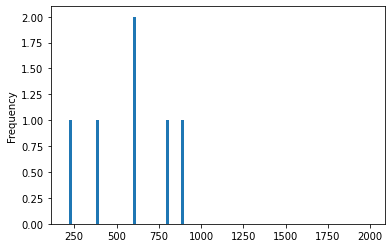

In [43]:
df.max_snow_imperial.plot(kind='hist', bins = 100, range=[200, 2000])

### Convert temperatures
key = temp_unit

1 = celsius

2 = farenheit

In [44]:
temp_cols = ['min_temp', 'max_temp']

In [45]:
df['min_temp_imperial'] = np.where(df['temp_unit']==2, df['min_temp'], (df['min_temp']+32)*9/5)
df.head()

,circle_name,country_state,lat,lon,count_year,count_date,n_field_counters,n_feeder_counters,min_field_parties,max_field_parties,field_hours,feeder_hours,nocturnal_hours,field_distance,nocturnal_distance,distance_units,min_temp,max_temp,temp_unit,min_wind,max_wind,wind_unit,min_snow,max_snow,snow_unit,am_cloud,pm_cloud,am_rain,pm_rain,am_snow,pm_snow,field_distance_imperial,field_distance_metric,nocturnal_distance_imperial,nocturnal_distance_metric,min_snow_imperial,min_snow_metric,max_snow_metric,max_snow_imperial,min_temp_imperial
0,Scotch Lake,CA-NB,45.950000,-66.983300,1901,12/25/00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Toronto,CA-ON,43.700000,-79.416700,1901,12/25/00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pacific Grove,US-CA,36.616700,-121.916700,1901,12/25/00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pueblo,US-CO,38.175251,-104.519575,1901,12/25/00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bristol,US-CT,41.671800,-72.949500,1901,12/25/00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df['max_temp_imperial'] = np.where(df['temp_unit']==2, df['max_temp'], (df['max_temp']+32)*9/5)

In [47]:
df.tail()

,circle_name,country_state,lat,lon,count_year,count_date,n_field_counters,n_feeder_counters,min_field_parties,max_field_parties,field_hours,feeder_hours,nocturnal_hours,field_distance,nocturnal_distance,distance_units,min_temp,max_temp,temp_unit,min_wind,max_wind,wind_unit,min_snow,max_snow,snow_unit,am_cloud,pm_cloud,am_rain,pm_rain,am_snow,pm_snow,field_distance_imperial,field_distance_metric,nocturnal_distance_imperial,nocturnal_distance_metric,min_snow_imperial,min_snow_metric,max_snow_metric,max_snow_imperial,min_temp_imperial,max_temp_imperial
106924,Sundance,US-WY,44.208072,-104.227101,2018,12/30/17,4.0,12.0,3.0,3.0,21.95,5.0,NaN,233.7,NaN,Miles,5.0,25.0,2.0,10.0,20.0,1.0,1.0,4.0,2.0,6.0,6.0,3,3,3,3,233.7,376.086257,NaN,NaN,1.0,2.54,10.16,4.0,5.0,25.0
106925,"Tortola, British V.I.",VG-,18.350191,-64.616712,2018,12/30/17,2.0,NaN,NaN,2.0,10.50,NaN,NaN,21.0,NaN,Miles,77.0,84.0,2.0,6.0,12.0,3.0,NaN,NaN,NaN,5.0,6.0,3,3,3,3,21.0,33.794657,NaN,NaN,NaN,NaN,NaN,NaN,77.0,84.0
106926,"East End, St. Croix, USVI",VI-,17.757222,-64.560191,2018,12/17/17,17.0,NaN,NaN,7.0,40.60,NaN,NaN,237.0,NaN,Miles,78.0,85.0,2.0,0.0,28.0,1.0,NaN,NaN,NaN,6.0,2.0,3,1,"3,1",3,237.0,381.396846,NaN,NaN,NaN,NaN,NaN,NaN,78.0,85.0
106927,"St. Croix, USVI",VI-,17.716794,-64.783308,2018,12/17/17,19.0,NaN,NaN,10.0,74.75,NaN,NaN,225.6,NaN,Miles,78.0,85.0,2.0,0.0,28.0,1.0,NaN,NaN,NaN,6.0,2.0,3,1,NaN,NaN,225.6,363.051175,NaN,NaN,NaN,NaN,NaN,NaN,78.0,85.0
106928,"St. John, USVI",VI-,18.350191,-64.700021,2018,12/23/17,24.0,NaN,16.0,16.0,30.00,0.0,NaN,18.0,NaN,Miles,73.0,85.0,2.0,0.0,7.0,1.0,NaN,NaN,NaN,1.0,1.0,3,3,NaN,NaN,18.0,28.966849,NaN,NaN,NaN,NaN,NaN,NaN,73.0,85.0


In [48]:
df['min_temp_metric'] = np.where(df['temp_unit']==1, df['min_temp'], (df['min_temp']-32)*5/9)
df['max_temp_metric'] = np.where(df['temp_unit']==1, df['max_temp'], (df['max_temp']-32)*5/9)

In [49]:
df[df.loc[:, 'temp_unit']==2].head()

,circle_name,country_state,lat,lon,count_year,count_date,n_field_counters,n_feeder_counters,min_field_parties,max_field_parties,field_hours,feeder_hours,nocturnal_hours,field_distance,nocturnal_distance,distance_units,min_temp,max_temp,temp_unit,min_wind,max_wind,wind_unit,min_snow,max_snow,snow_unit,am_cloud,pm_cloud,am_rain,pm_rain,am_snow,pm_snow,field_distance_imperial,field_distance_metric,nocturnal_distance_imperial,nocturnal_distance_metric,min_snow_imperial,min_snow_metric,max_snow_metric,max_snow_imperial,min_temp_imperial,max_temp_imperial,min_temp_metric,max_temp_metric
5778,Hope,US-AR,33.666700,-93.583300,1938,12/24/37,2.0,0.0,1.0,1.0,6.00,0.0,0.0,27.0,0.0,Miles,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,27.0,43.450274,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5964,Hope,US-AR,33.666700,-93.583300,1939,12/28/38,1.0,0.0,1.0,1.0,6.00,0.0,0.0,27.0,0.0,Miles,55.0,60.0,2.0,5.0,15.0,1.0,0.0,0.0,2.0,3.0,1.0,3,3,3,3,27.0,43.450274,0.0,0.0,0.0,0.0,0.0,0.0,55.0,60.0,12.777778,15.555556
6171,Hope,US-AR,33.666700,-93.583300,1940,12/26/39,1.0,0.0,1.0,1.0,6.00,0.0,0.0,16.0,0.0,Miles,40.0,40.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,2,3,3,3,16.0,25.748310,0.0,0.0,0.0,0.0,0.0,0.0,40.0,40.0,4.444444,4.444444
6439,Hope,US-AR,33.666700,-93.583300,1941,12/28/40,1.0,0.0,1.0,1.0,6.25,0.0,0.0,6.0,0.0,Miles,52.0,60.0,2.0,0.0,5.0,1.0,0.0,0.0,2.0,6.0,1.0,3,3,3,3,6.0,9.655616,0.0,0.0,0.0,0.0,0.0,0.0,52.0,60.0,11.111111,15.555556
6724,Barrie,CA-ON,44.362021,-79.745518,1942,12/26/41,2.0,0.0,1.0,1.0,8.50,0.0,0.0,7.0,0.0,Miles,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,11.264886,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Convert wind

In [50]:
df['max_wind'].value_counts().sort_values(ascending=False).head()

10.0    14290
5.0     12260
15.0    10741
0.0      6977
20.0     6264
Name: max_wind, dtype: int64

In [51]:
df["wind_unit"].value_counts()

1.0    49636
3.0     5902
0.0     1488
Name: wind_unit, dtype: int64

### wind_unit key

1 = mph

3 = kmh

In [52]:
df['min_wind_metric'] = np.where(df['wind_unit']==3, df['min_wind'], (df['min_wind'] /.6214))
df['max_wind_metric'] = np.where(df['wind_unit']==3, df['max_wind'], (df['max_wind'] / .6214))
df['min_wind_imperial'] = np.where(df['wind_unit']==1, df['min_wind'], (df['min_wind'] * .6214))
df['max_wind_imperial'] = np.where(df['wind_unit']==1, df['max_wind'], (df['max_wind'] * .6214))

In [53]:
df.min_wind_metric.value_counts().head(10)

0.000000     34274
8.046347     15158
16.092694     7169
4.827808      2895
24.139041     2744
3.218539      2503
1.609269      1725
12.874155     1691
9.655616      1345
6.437078      1304
Name: min_wind_metric, dtype: int64

In [54]:
df.min_wind_imperial.value_counts().head(10)

0.0000     34274
5.0000      9912
3.1070      5769
10.0000     4369
6.2140      3162
3.0000      1932
15.0000     1582
2.0000      1556
1.8642      1434
9.3210      1302
Name: min_wind_imperial, dtype: int64

Note that due to rounding, km to miles aren't exact.

## List all columns

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106925 entries, 0 to 106928
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   circle_name                  106925 non-null  object 
 1   country_state                106925 non-null  object 
 2   lat                          106925 non-null  float64
 3   lon                          106925 non-null  float64
 4   count_year                   106925 non-null  int64  
 5   count_date                   106925 non-null  object 
 6   n_field_counters             106707 non-null  float64
 7   n_feeder_counters            50575 non-null   float64
 8   min_field_parties            56210 non-null   float64
 9   max_field_parties            57093 non-null   float64
 10  field_hours                  97024 non-null   float64
 11  feeder_hours                 61910 non-null   float64
 12  nocturnal_hours              58526 non-null   float64
 13 

# Impossible value removal

In [56]:
df.min_wind_imperial.max()

70.0

That's okay

In [57]:
df.min_wind_imperial.min()

-16.0

That's not okay. Numbers must be positive. Will make all negative numbers positive.

In [58]:
df['min_wind_imperial'] = np.where(df['min_wind_imperial']<0, np.NaN, df['min_wind_imperial'])
df.min_wind_imperial.min()

0.0

Also need to do for metric equivalent.

In [59]:
df['min_wind_metric'] = np.where(df['min_wind_metric']<0, np.NaN, df['min_wind_metric'])
df.min_wind_metric.min()

0.0

In [60]:
df.max_wind_imperial.max()

500.0

That's not okay. Pretty sure that's faster than the highest ever recorded wind speed. Yep. Second fastest ever according to wikipedia is 231 mph (372 kmh).

In [61]:
df['max_wind_imperial'] = np.where(df['max_wind_imperial']>231, np.NaN, df['max_wind_imperial'])
df.max_wind_imperial.max()

201.0

Better. Need to do the same for metric.

In [62]:
df['max_wind_metric'] = np.where(df['max_wind_metric']>372, np.NaN, df['max_wind_metric'])
df.max_wind_metric.max()

323.4631477309302

ok

In [63]:
df.max_wind_imperial.min()

0.0

In [64]:
df.min_snow_imperial.max()

600.0

That's a lot of inches of snow, but not impossible, so we'll keep it for now.

In [65]:
df.min_snow_imperial.min()

0.0

Ok.

In [66]:
df.max_snow_imperial.max()

900.0

That's a lot of inches of snow, but not impossible, so we'll keep it for now.

In [67]:
df.max_snow_imperial.min()

0.0

Ok.

In [68]:
df['max_temp_imperial'].max()

28909.0

That's not okay. Highest air temperature reading according to wikipedia: 56.7 °C, 134.1 °F. Anything higher than those number will be removed.

In [69]:
df['max_temp_imperial'] = np.where(df['max_temp_imperial']>134, np.NaN, df['max_temp_imperial'])
df.max_temp_imperial.max()

133.2

In [70]:
df['max_temp_metric'] = np.where(df['max_temp_metric']>56, np.NaN, df['max_temp_metric'])
df.max_temp_metric.max()

56.0

In [71]:
df['max_temp_imperial'].min()

-302.4

That's mighty cold, but possible. Leaving alone for now.

In [72]:
df['min_temp_imperial'].max()

24996.0

Nope.

In [73]:
df['min_temp_imperial'] = np.where(df['min_temp_imperial']>134, np.NaN, df['min_temp_imperial'])
df.min_temp_imperial.max()

133.2

In [74]:
df['min_temp_metric'] = np.where(df['min_temp_metric']>56, np.NaN, df['min_temp_metric'])
df.min_temp_metric.max()

55.0

In [75]:
df['min_temp_imperial'].min()

-554.4

Nope, that's not possible. Let's drop anything less than -305F.

In [76]:
df['min_temp_imperial'] = np.where(df['min_temp_imperial']<-305, np.NaN, df['min_temp_imperial'])
df.min_temp_imperial.min()

-266.4

In [77]:
df['min_temp_metric'] = np.where(df['min_temp_metric']<-187, np.NaN, df['min_temp_metric'])
df.min_temp_metric.min()

-180.0

In [78]:
df['nocturnal_distance'].max()

33080.0

Seems like a lot. Leaving alone for now.

In [79]:
df['nocturnal_distance'].min()

0.0

Ok.

In [80]:
df['field_distance'].max()

61087.0

Seems like a lot. Leaving alone for now.

In [81]:
df['field_distance'].min()

0.0

Ok. Let's look at other columns.

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106925 entries, 0 to 106928
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   circle_name                  106925 non-null  object 
 1   country_state                106925 non-null  object 
 2   lat                          106925 non-null  float64
 3   lon                          106925 non-null  float64
 4   count_year                   106925 non-null  int64  
 5   count_date                   106925 non-null  object 
 6   n_field_counters             106707 non-null  float64
 7   n_feeder_counters            50575 non-null   float64
 8   min_field_parties            56210 non-null   float64
 9   max_field_parties            57093 non-null   float64
 10  field_hours                  97024 non-null   float64
 11  feeder_hours                 61910 non-null   float64
 12  nocturnal_hours              58526 non-null   float64
 13 

In [83]:
df.feeder_hours.min()

-56.0

That doesn't make sense. Let's drop values < 0.

In [84]:
df['feeder_hours'] = np.where(df['feeder_hours']<0, np.NaN, df['feeder_hours'])
df.feeder_hours.min()

0.0

In [85]:
df.min_field_parties.max()

150.0

In [86]:
df.min_field_parties.min()

0.0

In [87]:
df.field_hours.max()

4407.0

In [88]:
df.field_hours.min()

0.0

In [89]:
df.nocturnal_hours.min()

0.0

In [90]:
df.nocturnal_hours.max()

1105.0

## Question: What's the maximum number of hours possible?

In [91]:
df.describe()

,lat,lon,count_year,n_field_counters,n_feeder_counters,min_field_parties,max_field_parties,field_hours,feeder_hours,nocturnal_hours,field_distance,nocturnal_distance,min_temp,max_temp,temp_unit,min_wind,max_wind,wind_unit,min_snow,max_snow,snow_unit,am_cloud,pm_cloud,field_distance_imperial,field_distance_metric,nocturnal_distance_imperial,nocturnal_distance_metric,min_snow_imperial,min_snow_metric,max_snow_metric,max_snow_imperial,min_temp_imperial,max_temp_imperial,min_temp_metric,max_temp_metric,min_wind_metric,max_wind_metric,min_wind_imperial,max_wind_imperial
count,106925.000000,106925.000000,106925.000000,106707.000000,50575.000000,56210.000000,57093.000000,97024.000000,61909.000000,58526.000000,98802.000000,53193.000000,82436.000000,82420.000000,57026.000000,80027.000000,80109.000000,57026.000000,76936.000000,77165.000000,53379.000000,82396.000000,82268.000000,98802.000000,98802.000000,53193.000000,53193.000000,76936.000000,76936.000000,77165.000000,77165.000000,79312.000000,72661.000000,82169.000000,82019.000000,80026.000000,80106.000000,80026.000000,80108.000000
mean,39.988133,-91.624462,1987.639149,20.836352,4.657242,8.273261,9.941009,61.543311,10.987286,2.811273,285.538319,15.829516,25.614842,39.807880,1.883474,4.383454,12.424563,1.180900,2.024964,4.493643,2.207160,2.978021,3.243084,277.335525,446.307572,15.287001,24.611710,1.327039,4.506023,9.880511,3.066281,49.873529,60.111487,-2.329769,5.710373,6.825057,19.331318,3.643924,10.539653
std,7.594241,19.897468,24.865097,21.376734,15.635358,7.591907,9.100070,56.407573,39.120003,7.010222,275.976110,145.776465,90.381411,102.846389,0.320857,5.703883,10.146659,0.638249,5.576817,11.105600,0.609436,2.016466,2.136045,223.798377,360.151878,92.756857,149.273861,4.095741,12.392097,23.869954,8.405430,36.214068,33.391977,10.942861,11.421415,8.830635,15.240491,4.769528,8.693862
min,-77.461409,-177.380631,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-340.000000,-200.000000,1.000000,-16.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-266.400000,-302.400000,-180.000000,-200.000000,0.000000,0.000000,0.000000,0.000000
25%,36.500018,-102.483303,1975.000000,8.000000,0.000000,4.000000,5.000000,27.300000,0.000000,0.000000,136.000000,0.000000,15.000000,28.000000,2.000000,0.000000,5.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,132.000000,212.423560,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,35.000000,-8.333333,-1.111111,0.000000,8.046347,0.000000,5.000000
50%,40.816675,-88.024596,1993.000000,15.000000,1.000000,6.000000,8.000000,48.000000,3.000000,1.000000,256.000000,3.000000,27.000000,39.000000,2.000000,3.000000,10.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,251.000000,403.926617,3.000000,4.827808,0.000000,0.000000,0.000000,0.000000,38.000000,51.000000,-2.222222,4.444444,4.827808,16.092694,2.000000,9.321000
75%,44.076819,-78.550000,2007.000000,27.000000,5.000000,10.000000,12.000000,78.000000,10.000000,4.000000,392.725000,20.000000,36.000000,52.000000,2.000000,6.000000,15.000000,1.000000,2.000000,5.000000,2.000000,5.000000,6.000000,384.300000,618.442227,20.000000,32.185388,1.000000,4.000000,12.700000,3.543307,75.600000,81.000000,3.000000,12.777778,9.000000,24.139041,5.000000,15.000000
max,74.716700,179.284881,2018.000000,501.000000,968.000000,150.000000,322.000000,4407.000000,6105.000000,1105.000000,61087.000000,33080.000000,24996.000000,28909.000000,2.000000,99.000000,500.000000,3.000000,600.000000,900.000000,4.000000,7.000000,7.000000,37959.461800,61087.000000,20555.912000,33080.000000,600.000000,1524.000000,2286.000000,900.000000,133.200000,133.200000,55.000000,56.000000,112.648857,323.463148,70.000000,201.000000


All these numeric values appear to possible (perhaps with exception of the maximum number of hours for some tasks. 

Note that impossible values for derived columns with _imperial_ and _metric_ suffixes were replaced with NaN. The original column values were not replaced (e.g. max_wind wasn't replaced). 

Also note that missing values were not imputed. Depending upon the variable of interest and the analysis, missing values might want to be treated various ways.

## Limit the Data to Use Circles in the USA

In [92]:
print(df.shape)
df.head(10)

(106925, 47)


,circle_name,country_state,lat,lon,count_year,count_date,n_field_counters,n_feeder_counters,min_field_parties,max_field_parties,field_hours,feeder_hours,nocturnal_hours,field_distance,nocturnal_distance,distance_units,min_temp,max_temp,temp_unit,min_wind,max_wind,wind_unit,min_snow,max_snow,snow_unit,am_cloud,pm_cloud,am_rain,pm_rain,am_snow,pm_snow,field_distance_imperial,field_distance_metric,nocturnal_distance_imperial,nocturnal_distance_metric,min_snow_imperial,min_snow_metric,max_snow_metric,max_snow_imperial,min_temp_imperial,max_temp_imperial,min_temp_metric,max_temp_metric,min_wind_metric,max_wind_metric,min_wind_imperial,max_wind_imperial
0,Scotch Lake,CA-NB,45.950000,-66.983300,1901,12/25/00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Toronto,CA-ON,43.700000,-79.416700,1901,12/25/00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pacific Grove,US-CA,36.616700,-121.916700,1901,12/25/00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pueblo,US-CO,38.175251,-104.519575,1901,12/25/00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bristol,US-CT,41.671800,-72.949500,1901,12/25/00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Norwalk,US-CT,41.116700,-73.400000,1901,12/25/00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Glen Ellyn,US-IL,41.883300,-88.066700,1901,12/25/00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Baldwin,US-LA,29.833300,-91.550000,1901,12/25/00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Belmont,US-MA,42.383300,-71.166700,1901,12/25/00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Greater Boston,US-MA,42.397309,-71.095501,1901,12/26/00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
# Drop all the locations that are not in the united states 
indexNamesNUSA = df[~df['country_state'].str.contains("US-", case=False)].index
 
# Delete these row indexes from dataFrame
df.drop(indexNamesNUSA , inplace=True)

In [94]:
print(df.shape)
df.head(10)

(90764, 47)


,circle_name,country_state,lat,lon,count_year,count_date,n_field_counters,n_feeder_counters,min_field_parties,max_field_parties,field_hours,feeder_hours,nocturnal_hours,field_distance,nocturnal_distance,distance_units,min_temp,max_temp,temp_unit,min_wind,max_wind,wind_unit,min_snow,max_snow,snow_unit,am_cloud,pm_cloud,am_rain,pm_rain,am_snow,pm_snow,field_distance_imperial,field_distance_metric,nocturnal_distance_imperial,nocturnal_distance_metric,min_snow_imperial,min_snow_metric,max_snow_metric,max_snow_imperial,min_temp_imperial,max_temp_imperial,min_temp_metric,max_temp_metric,min_wind_metric,max_wind_metric,min_wind_imperial,max_wind_imperial
2,Pacific Grove,US-CA,36.616700,-121.916700,1901,12/25/00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pueblo,US-CO,38.175251,-104.519575,1901,12/25/00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bristol,US-CT,41.671800,-72.949500,1901,12/25/00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Norwalk,US-CT,41.116700,-73.400000,1901,12/25/00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Glen Ellyn,US-IL,41.883300,-88.066700,1901,12/25/00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Baldwin,US-LA,29.833300,-91.550000,1901,12/25/00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Belmont,US-MA,42.383300,-71.166700,1901,12/25/00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Greater Boston,US-MA,42.397309,-71.095501,1901,12/26/00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Winchester,US-MA,42.450000,-71.133300,1901,12/25/00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,La Grange,US-MO,40.050000,-91.500000,1901,12/25/00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Check for Duplicates and Create a Unique Identifyer 
The unqique identifyer will be a combonation of the:
<first 4 digits of the lat><the first four digits of the lon> _count_year

In [95]:
# Create the unique identifyer 
df['ui'] = df['lat'].astype(str) + df['lon'].astype(str) + "_" + df['count_year'].astype(str)

In [96]:
print("There are this many unique circles according to the identyfyer:")
df['ui'].nunique()

There are this many unique circles according to the identyfyer:


90411

In [97]:
# This value is lower than the number of rows in the dataset, implying that some rows might be duplicates 
df.shape

(90764, 48)

In [98]:
# Create a dataframe of only the suspected duplicated values 
temp_df = df[df.duplicated(['ui'], keep = False)]

In [99]:
# Review the data items in this dataframe. It does appear that there are true duplicates in this dataset
print(temp_df.shape)
temp_df.sort_values(by=['ui'])

(658, 48)


,circle_name,country_state,lat,lon,count_year,count_date,n_field_counters,n_feeder_counters,min_field_parties,max_field_parties,field_hours,feeder_hours,nocturnal_hours,field_distance,nocturnal_distance,distance_units,min_temp,max_temp,temp_unit,min_wind,max_wind,wind_unit,min_snow,max_snow,snow_unit,am_cloud,pm_cloud,am_rain,pm_rain,am_snow,pm_snow,field_distance_imperial,field_distance_metric,nocturnal_distance_imperial,nocturnal_distance_metric,min_snow_imperial,min_snow_metric,max_snow_metric,max_snow_imperial,min_temp_imperial,max_temp_imperial,min_temp_metric,max_temp_metric,min_wind_metric,max_wind_metric,min_wind_imperial,max_wind_imperial,ui
361,Palma Sola,US-FL,27.516700,-82.633300,1907,12/28/06,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.5167-82.6333_1907
360,Palma Sola,US-FL,27.516700,-82.633300,1907,12/26/06,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.5167-82.6333_1907
359,Palma Sola,US-FL,27.516700,-82.633300,1907,12/25/06,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.5167-82.6333_1907
2034,Daytona Beach,US-FL,29.200000,-81.033300,1917,12/26/16,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.2-81.0333_1917
2035,Daytona Beach,US-FL,29.200000,-81.033300,1917,12/27/16,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.2-81.0333_1917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4194,"McMillan, Luce County",US-MI,46.333300,-85.683300,1929,12/25/28,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.3333-85.6833_1929
2949,Olympia,US-WA,47.072247,-122.853297,1922,12/23/21,2.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,37.013196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.072247-122.853297_1922
2950,Olympia,US-WA,47.072247,-122.853297,1922,12/24/21,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.072247-122.853297_1922
3146,Olympia,US-WA,47.072247,-122.853297,1923,12/26/22,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.072247-122.853297_1923


There appears to be some true duplicate rows inside of this dataset, so we should remove those 

In [100]:
df = df.drop_duplicates(subset='ui', keep="first")

In [101]:
df.shape

(90411, 48)

In [102]:
print("There are this many unique circles according to the identyfyer:")
df['ui'].nunique()

There are this many unique circles according to the identyfyer:


90411

There are now one unique identifyer for each row 

## Save the Output

In [103]:
df.to_csv("../data/Cloud_Data/1.0-rec-initial-data-cleaning.txt", sep="\t", index=False)

In [104]:
df.loc[df['circle_name'] == "Fairbanks"]

,circle_name,country_state,lat,lon,count_year,count_date,n_field_counters,n_feeder_counters,min_field_parties,max_field_parties,field_hours,feeder_hours,nocturnal_hours,field_distance,nocturnal_distance,distance_units,min_temp,max_temp,temp_unit,min_wind,max_wind,wind_unit,min_snow,max_snow,snow_unit,am_cloud,pm_cloud,am_rain,pm_rain,am_snow,pm_snow,field_distance_imperial,field_distance_metric,nocturnal_distance_imperial,nocturnal_distance_metric,min_snow_imperial,min_snow_metric,max_snow_metric,max_snow_imperial,min_temp_imperial,max_temp_imperial,min_temp_metric,max_temp_metric,min_wind_metric,max_wind_metric,min_wind_imperial,max_wind_imperial,ui
17417,Fairbanks,US-AK,64.877908,-147.846632,1965,1/3/65,11.0,NaN,NaN,NaN,27.00,NaN,NaN,169.00,NaN,Miles,-40.0,-26.0,NaN,0.0,0.0,NaN,30.0,30.0,NaN,1.0,4.0,4,4,4,4,169.00,271.966527,NaN,NaN,11.811024,76.20,76.20,11.811024,-14.4,10.8,-40.000000,-32.222222,0.000000,0.000000,0.0000,0.0000,64.87790799999999-147.846632_1965
18165,Fairbanks,US-AK,64.877908,-147.846632,1966,1/2/66,8.0,NaN,NaN,NaN,9.00,NaN,NaN,38.00,NaN,Miles,-51.0,-9.0,2.0,0.0,12.0,1.0,32.0,32.0,2.0,1.0,4.0,4,4,4,4,38.00,61.152237,NaN,NaN,32.000000,81.28,81.28,32.000000,-51.0,-9.0,-46.111111,-22.777778,0.000000,19.311233,0.0000,12.0000,64.87790799999999-147.846632_1966
18993,Fairbanks,US-AK,64.877908,-147.846632,1967,12/31/66,9.0,NaN,NaN,NaN,13.00,NaN,NaN,85.00,NaN,Miles,-18.0,-9.0,NaN,0.0,0.0,NaN,19.0,19.0,NaN,1.0,1.0,4,4,4,4,85.00,136.787898,NaN,NaN,7.480315,48.26,48.26,7.480315,25.2,41.4,-27.777778,-22.777778,0.000000,0.000000,0.0000,0.0000,64.87790799999999-147.846632_1967
20695,Fairbanks,US-AK,64.877908,-147.846632,1969,12/29/68,16.0,NaN,NaN,NaN,26.00,NaN,NaN,190.00,NaN,Miles,-42.0,-15.0,NaN,0.0,3.0,NaN,33.0,33.0,NaN,2.0,4.0,4,4,4,4,190.00,305.761184,NaN,NaN,12.992126,83.82,83.82,12.992126,-18.0,30.6,-41.111111,-26.111111,0.000000,4.827808,0.0000,1.8642,64.87790799999999-147.846632_1969
21563,Fairbanks,US-AK,64.877908,-147.846632,1970,12/28/69,23.0,NaN,NaN,NaN,39.00,NaN,NaN,160.00,NaN,Miles,2.0,20.0,NaN,0.0,15.0,NaN,6.0,6.0,NaN,2.0,2.0,4,4,4,4,160.00,257.483103,NaN,NaN,2.362205,15.24,15.24,2.362205,61.2,93.6,-16.666667,-6.666667,0.000000,24.139041,0.0000,9.3210,64.87790799999999-147.846632_1970
22460,Fairbanks,US-AK,64.877908,-147.846632,1971,12/27/70,18.0,NaN,NaN,NaN,30.00,NaN,NaN,230.00,NaN,Miles,-34.0,-23.0,NaN,0.0,5.0,NaN,50.0,50.0,NaN,2.0,2.0,3,3,2,2,230.00,370.131960,NaN,NaN,19.685039,127.00,127.00,19.685039,-3.6,16.2,-36.666667,-30.555556,0.000000,8.046347,0.0000,3.1070,64.87790799999999-147.846632_1971
23371,Fairbanks,US-AK,64.877908,-147.846632,1972,1/2/72,21.0,NaN,NaN,NaN,25.00,NaN,NaN,226.00,NaN,Miles,-18.0,-5.0,NaN,0.0,20.0,NaN,25.0,25.0,NaN,2.0,2.0,3,3,3,3,226.00,363.694883,NaN,NaN,9.842520,63.50,63.50,9.842520,25.2,48.6,-27.777778,-20.555556,0.000000,32.185388,0.0000,12.4280,64.87790799999999-147.846632_1972
24368,Fairbanks,US-AK,64.877908,-147.846632,1973,12/16/72,27.0,NaN,NaN,NaN,37.00,10.00,NaN,306.00,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,306.00,492.436434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.87790799999999-147.846632_1973
25415,Fairbanks,US-AK,64.877908,-147.846632,1974,12/23/73,5.0,NaN,NaN,NaN,18.00,13.00,NaN,191.00,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,191.00,307.370454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.87790799999999-147.846632_1974
26501,Fairbanks,US-AK,64.877908,-147.846632,1975,12/14/74,14.0,NaN,NaN,NaN,29.00,10.00,NaN,269.00,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,269.00,432.893466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.87790799999999-147.846632_1975
